In [25]:
import matplotlib.pyplot as plt
from U_viz import MoleculeVisualizer as MV
import chempotpy as chem
import numpy as np


In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
def int_to_cart(R,rt_atoms=0): # Internal to cartesian converted (optional)
    r1, r2, r3, o1, o2, p = R
    coords = np.array([ 
            [0.0, 0.0, 0.0],
            [0.0, 0.0, r3],
            [r1*np.sin(o1), 0.0, r1*np.cos(o1)],
            [r2*np.sin(o2)*np.cos(p), r2*np.sin(o2)*np.sin(p), r2*np.cos(o2)],
            ])
    if rt_atoms == 2:
        return np.array([ 
            ['C',0.0, 0.0, 0.0],
            ['O',0.0, 0.0, r3],
            ['H',r1*np.sin(o1), 0.0, r1*np.cos(o1)],
            ['H',r2*np.sin(o2)*np.cos(p), r2*np.sin(o2)*np.sin(p), r2*np.cos(o2)],
            ])
    elif rt_atoms == 1:
        atoms = ['C','O','H','H']
        return coords, atoms
    else:
        return coords
    
def cart_to_int(coords): # Cartesian to Internal converted (optional)
    import math
    N = np.linalg.norm
    r1_v, r2_v, r3_v = np.copy(coords[2,:]-coords[0,:]), np.copy(coords[3,:]-coords[0,:]), np.copy(coords[1,:]-coords[0,:]) # r3 vector is consider to be z-axis in the local frame
    r1 = N(r1_v)
    r2 = N(r2_v)
    r3 = N(r3_v)
    o1 = np.arccos(np.dot(r1_v,r3_v)/(r1*r3))
    o2 = np.arccos(np.dot(r2_v,r3_v)/(r2*r3))
    #Local X vector defined based on H1
    x_vec = (r1_v -  np.dot(r1_v,r3_v)*r3_v/r3**2.0)
    x_vec = x_vec/N(x_vec)
    p = np.arccos(np.dot(x_vec,r2_v)/(r2*np.sin(o2)))
    return np.array([r1,r2,r3,o1,o2,p])


In [28]:
formaldehyde_internal = np.array([1.09457102, 1.09457102, 1.30954542, 1.98084386, 1.98084406, 2.36370751])# ground state equilibrium geometry of formaldehyde
HCOH_internal = np.array([1.08819581, 1.90271097, 1.33744874, 2.15986917, 0.49437038,1.76980513])# Hydrogen peroxide like reactive intermediate of formaldehyde


In [29]:
# conversion if needed
geom, atoms = int_to_cart(formaldehyde_internal,rt_atoms=1)


In [30]:
## constructing visualization object
mv = MV(atoms,geom,int_to_cart=int_to_cart,cart_to_int=cart_to_int) 


Internal to cartesian transformation provided
Cartesian to internal transformation provided


In [31]:
# Visualizing formaldehyde using internal coordinates
Mol = "H2CO"
view = mv.visualize(coords=formaldehyde_internal, name=Mol)
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [32]:
## Vizualization using cartesian
geom, atoms = int_to_cart(formaldehyde_internal,rt_atoms=1)
Mol = "H2CO"
view = mv.visualize(coords=geom, name=Mol)
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [33]:

## Visualizing HCOH in internal coordinates
#geom, atoms = int_to_cart(HCOH_internal,rt_atoms=1)
Mol = "HCOH"
view = mv.visualize(coords=HCOH_internal, name=Mol)
view.show()
#A similar approach to formaldhyde above can be don eif you wish to visualize using cartesian coordinates

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Matplotlib based optimization

(<Axes3D: title={'center': 'H2CO'}, xlabel='X-axis (Å)', ylabel='Y-axis (Å)', zlabel='Z-axis (Å)'>,
 <module 'matplotlib.pyplot' from '/opt/homebrew/lib/python3.11/site-packages/matplotlib/pyplot.py'>)

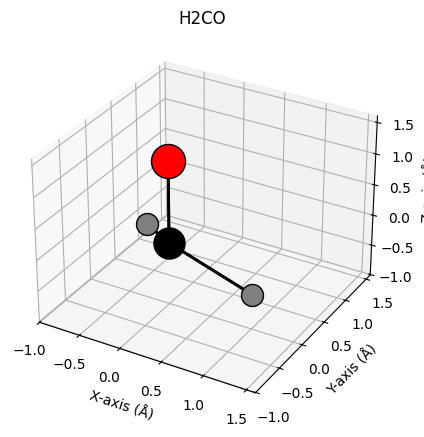

In [34]:

Mol = "H2CO"
mv.visualize_matplotlib(coords=formaldehyde_internal, name=Mol)

(<Axes3D: title={'center': 'HCOH'}, xlabel='X-axis (Å)', ylabel='Y-axis (Å)', zlabel='Z-axis (Å)'>,
 <module 'matplotlib.pyplot' from '/opt/homebrew/lib/python3.11/site-packages/matplotlib/pyplot.py'>)

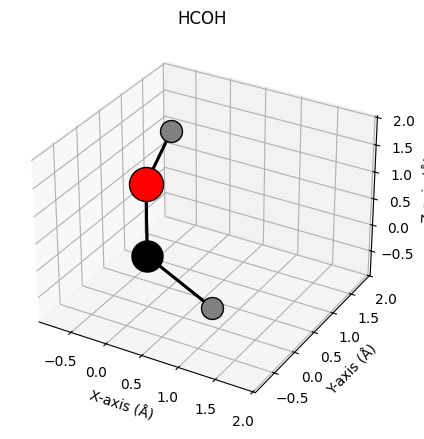

In [35]:
Mol = "HCOH"
mv.visualize_matplotlib(coords=HCOH_internal, name=Mol)